# Original

https://www.kaggle.com/code/namantrisoliya/statistical-analysis-8-ml-models-acc-92-34

# Weather Type Classification

Forecast with Precision: Simulated Data for Predicting Weather Types

## About Dataset

### Description

This dataset is synthetically generated to mimic weather data for classification tasks. It includes various weather-related features and categorizes the weather into four types: Rainy, Sunny, Cloudy, and Snowy. This dataset is designed for practicing classification algorithms, data preprocessing, and outlier detection methods.

### Variables

- **Temperature (numeric)**: The temperature in degrees Celsisus, ranging from extreme cold to extreme heat.
- **Humidity (numeric)**: The humidity percentage, including values above 100% to introduce outliers.
- **Wind Speed (numeric)**: The wind speed in kilometers per hour, with a range including unrealistically high values.
- **Precipitation (%) (numeric)**: The precipitation percentage, including outlier values.
- **Cloud Cover (categorical)**: The cloud cover descrription.
- **Atmospheric Pressure (numeric)**: The atmospheric pressure in hPa, covering a wide range.
- **UV Index (numeric)**: The UV index, indicating the strength of ultraviolet radiation.
- **Season (categorical)**: The season during which the data was recorded.
- **Visibility (km) (numeric)**: The visibility in kilometers, including very low or very high values.
- **Location (categorical)**: The type of location where the data was recorded.
- **Weather Type (categorical)**: The target variable for classification, indicating the weather type.

### Purpose ans Utility

This dataset is useful for data scientists, students especially beginners, and practitioners to investigate classification algorithm's performance, practice data preprocessing, feature engineering, model evaluation, and test outlier detection methods. It provides opportunities for learning and experimenting with weather data analysis and machine learning techniques.

### Important Note

This dataset is synthetically producted and does not convey real-world weather data. It includes intentional outliers to provide opportunities for practicing outlier detection and handling. The values, ranges, and distributions may not accurately represent real-word conditions, and the data should primarily be used for educational and experimental purposes.

In [1]:
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import confusion_matrix, accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
import zipfile

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
%matplotlib inline
%reload_ext autotime

time: 0 ns (started: 2024-07-10 01:09:57 +09:00)


In [2]:
!kaggle datasets download -d nikhil7280/weather-type-classification

with zipfile.ZipFile('./weather-type-classification.zip', 'r') as zip_ref:
    zip_ref.extractall()

weather-type-classification.zip: Skipping, found more recently modified local copy (use --force to force download)
time: 1.17 s (started: 2024-07-10 01:09:57 +09:00)


In [3]:
data = pd.read_csv('./weather_classification_data.csv')

data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


time: 31 ms (started: 2024-07-10 01:09:58 +09:00)


In [4]:
data.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

time: 0 ns (started: 2024-07-10 01:09:58 +09:00)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB
time: 16 ms (started: 2024-07-10 01:09:58 +09:00)


In [6]:
target = 'Weather Type'

print(f"Target columns: {target}")

Target columns: Weather Type
time: 16 ms (started: 2024-07-10 01:09:58 +09:00)


# EDA

## Categorical Features Analysis

In [7]:
categorical_cols = data.select_dtypes(exclude='number').columns

print(f"Categorical Columns: {categorical_cols}")

Categorical Columns: Index(['Cloud Cover', 'Season', 'Location', 'Weather Type'], dtype='object')
time: 15 ms (started: 2024-07-10 01:09:58 +09:00)


In [8]:
data.describe(exclude='number')

,Cloud Cover,Season,Location,Weather Type
count,13200,13200,13200,13200
unique,4,4,3,4
top,overcast,Winter,inland,Rainy
freq,6090,5610,4816,3300


time: 16 ms (started: 2024-07-10 01:09:58 +09:00)


### Value Countplot

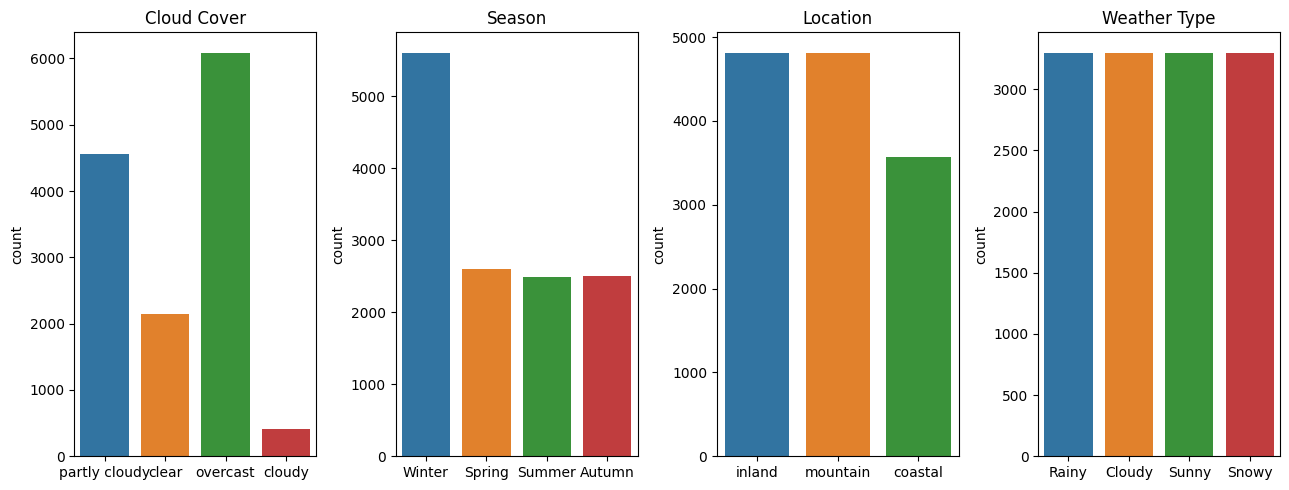

time: 547 ms (started: 2024-07-10 01:09:58 +09:00)


In [9]:
# Calculate the number of rows required
n_cols = 4
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(13, 5 * n_rows))
ax = ax.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, hue=col, ax=ax[i], legend=False)
    ax[i].set_title(col)
    ax[i].set_xlabel("")
    
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])
    
plt.tight_layout()
plt.show()

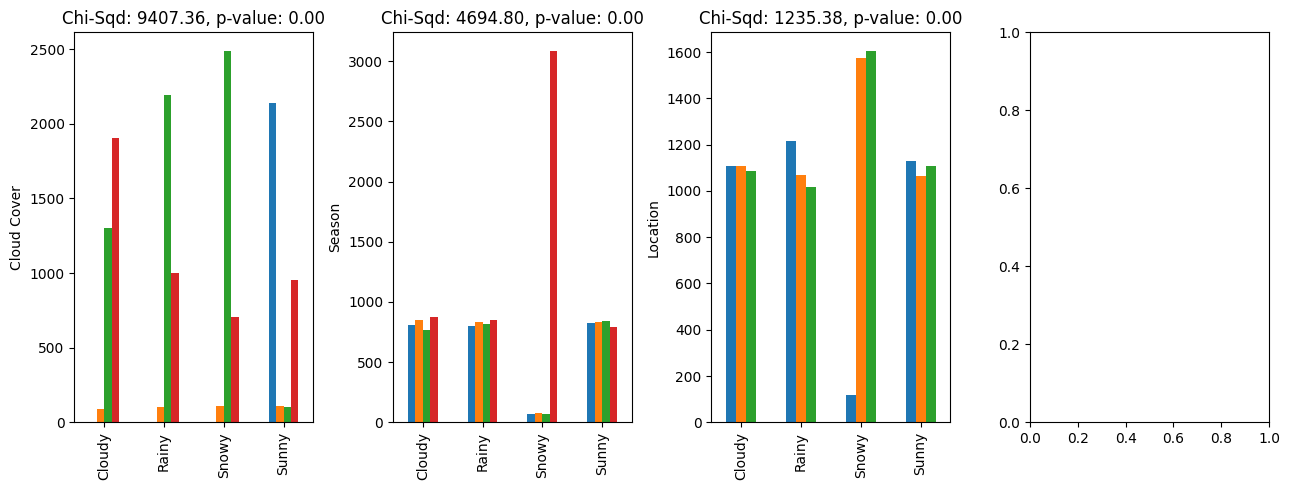

time: 422 ms (started: 2024-07-10 01:09:59 +09:00)


In [10]:
# Calculate the number of rows and columns required
n_cols = 4
n_rows = (len(categorical_cols) + n_cols - 2) // n_cols

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(13, 5 * n_rows))
ax = ax.flatten()
cat_selected = []

for i, col in enumerate(categorical_cols):
    if col == target:
        continue
    
    k = pd.crosstab(data[target], data[col])
    k.plot.bar(ax=ax[i], legend=False)
    
    try:
        stat, p, dof, expected = stats.chi2_contingency(k)
        text_str = f"Chi-Sqd: {stat:.2f}, p-value: {p:.2f}"
        if p < 0.2:
            cat_selected.append(col)
    except ValueError as e:
        text_str = "Chi-Sqd test error"
        
    ax[i].set_title(text_str)
    ax[i].tick_params(axis='x', rotation=90)
    ax[i].set_xlabel("")
    ax[i].set_ylabel(col)
    
for j in range(i + 1, len(ax)):
    fig.delaxes(ax[j])
    
plt.tight_layout()
plt.show()

By observing above p-values and Chi-squared test we can conclude that only some features has significant effect on target with p-value < 0.2

In [11]:
print(cat_selected)

['Cloud Cover', 'Season', 'Location']
time: 0 ns (started: 2024-07-10 01:09:59 +09:00)


## Numerical Features Analysis

In [12]:
numerical_cols = data.select_dtypes(include='number').columns

print(f"Numerical Columns: {numerical_cols}")

Numerical Columns: Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Atmospheric Pressure', 'UV Index', 'Visibility (km)'],
      dtype='object')
time: 0 ns (started: 2024-07-10 01:09:59 +09:00)


In [13]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


time: 16 ms (started: 2024-07-10 01:09:59 +09:00)


### Univariate Distribution Analysis with Skewness and Kurtosis Measures

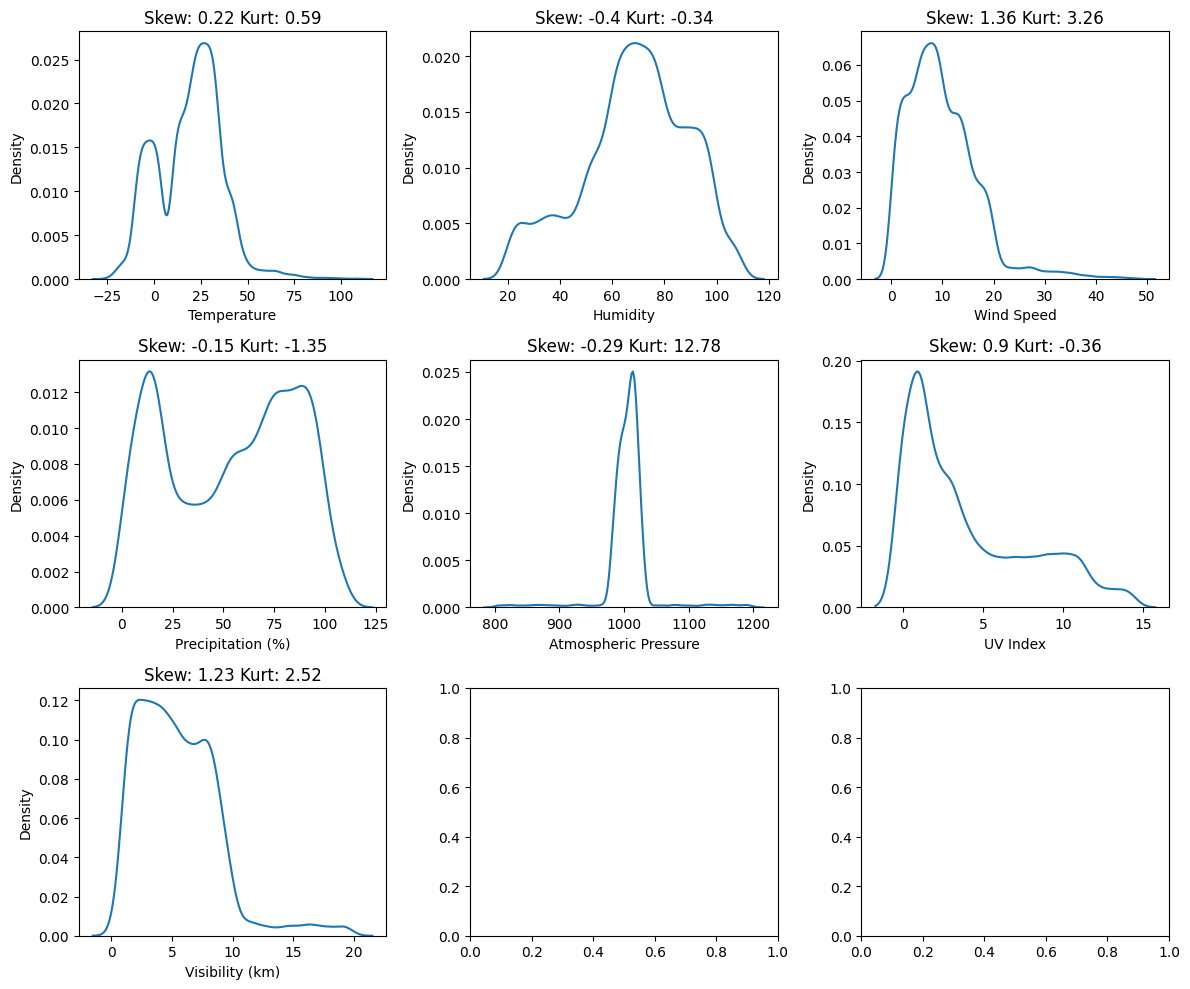

time: 1.84 s (started: 2024-07-10 01:09:59 +09:00)


In [14]:
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 10))
ax = ax.flatten()

for i, col in enumerate(numerical_cols):
    sns.kdeplot(data=data, x=col, ax=ax[i])
    skewness = round(stats.skew(data[col], bias=False), 2)
    kurt = round(stats.kurtosis(data[col], bias=False), 2)
    text = f"Skew: {skewness} Kurt: {kurt}"
    ax[i].set_title(text)
    
for j in range(i + 1, len(numerical_cols)):
    fig.delaxes[ax[j]]
    
plt.tight_layout()
plt.show()

### Univariate Boxplots

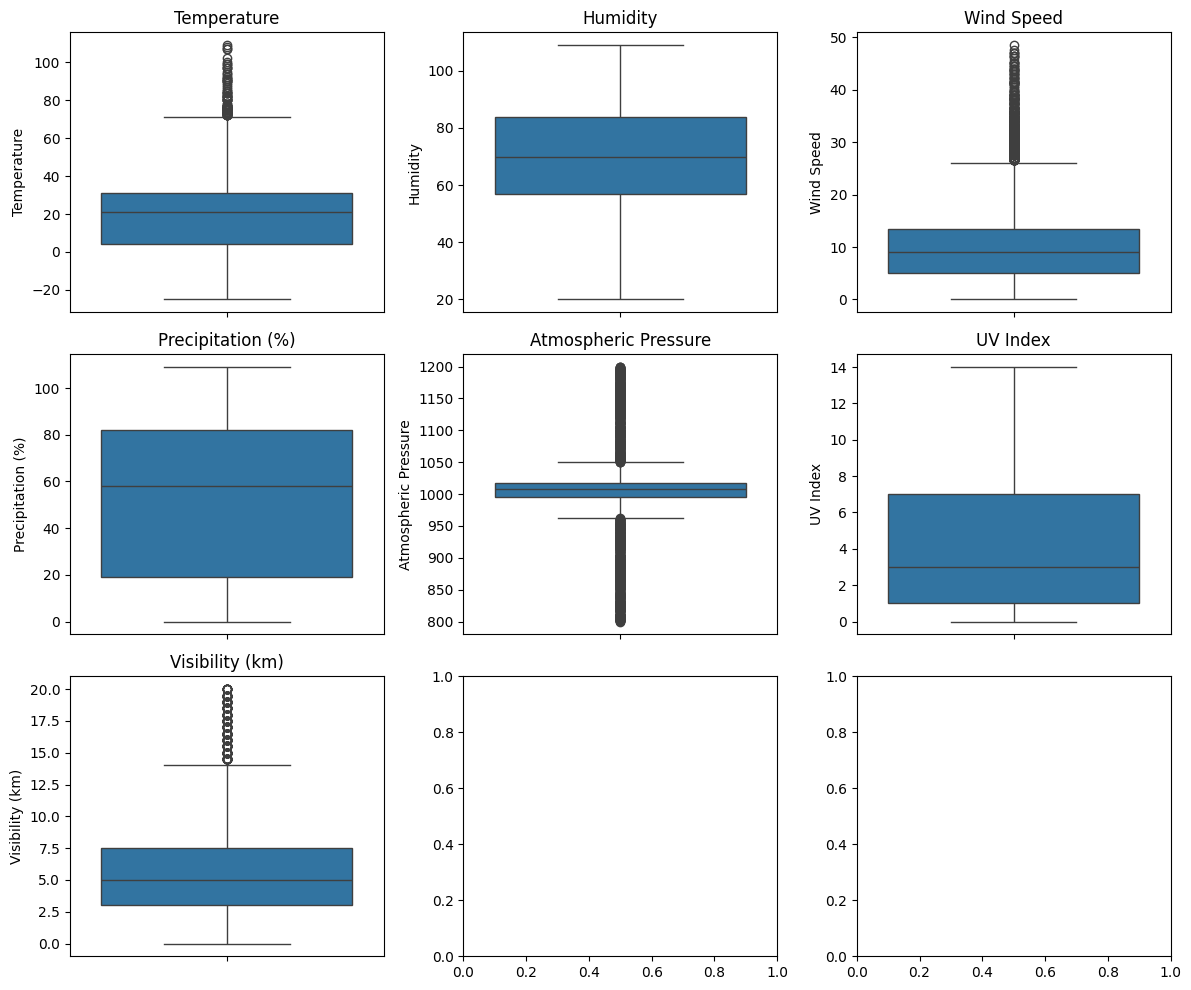

time: 859 ms (started: 2024-07-10 01:10:01 +09:00)


In [15]:
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 10))
ax = ax.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=data, y=col, ax=ax[i])
    ax[i].set_title(col)
    
for j in range(i + 1, len(numerical_cols)):
    fig.delaxes(ax[j])
    
plt.tight_layout()
plt.show()

### Target vs. Feature barplot

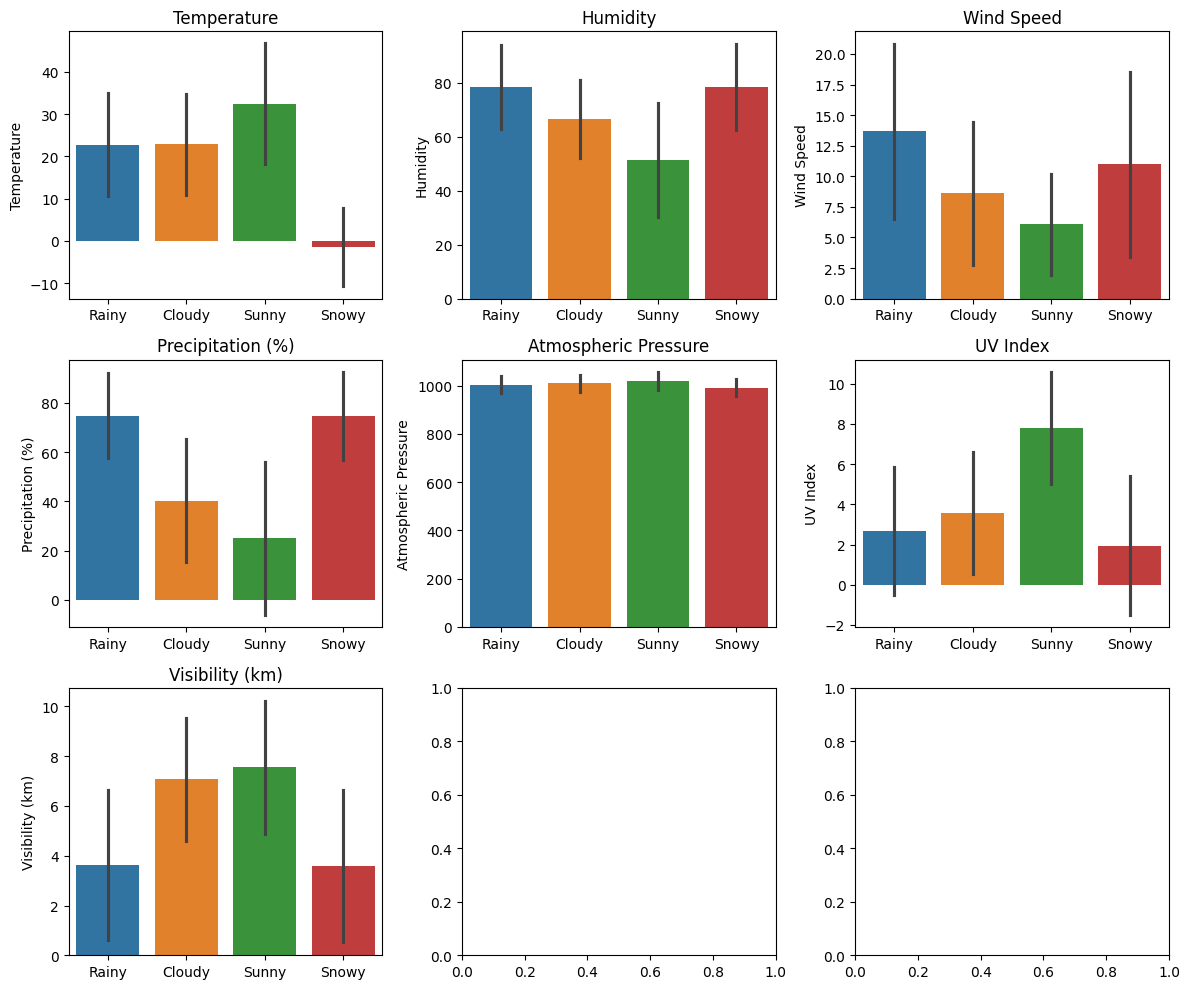

time: 1.03 s (started: 2024-07-10 01:10:02 +09:00)


In [16]:
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 10))
ax = ax.flatten()

for i, col in enumerate(numerical_cols):
    sns.barplot(data=data, x=target, y=col, hue=target, errorbar='sd', ax=ax[i], estimator=np.mean, legend=False)
    ax[i].set_title(col)
    ax[i].set_xlabel("")
    
for j in range(i + 1, len(numerical_cols)):
    fig.delaxes(ax[j])
    
plt.tight_layout()
plt.show()

### Target vs. Feature Boxplot

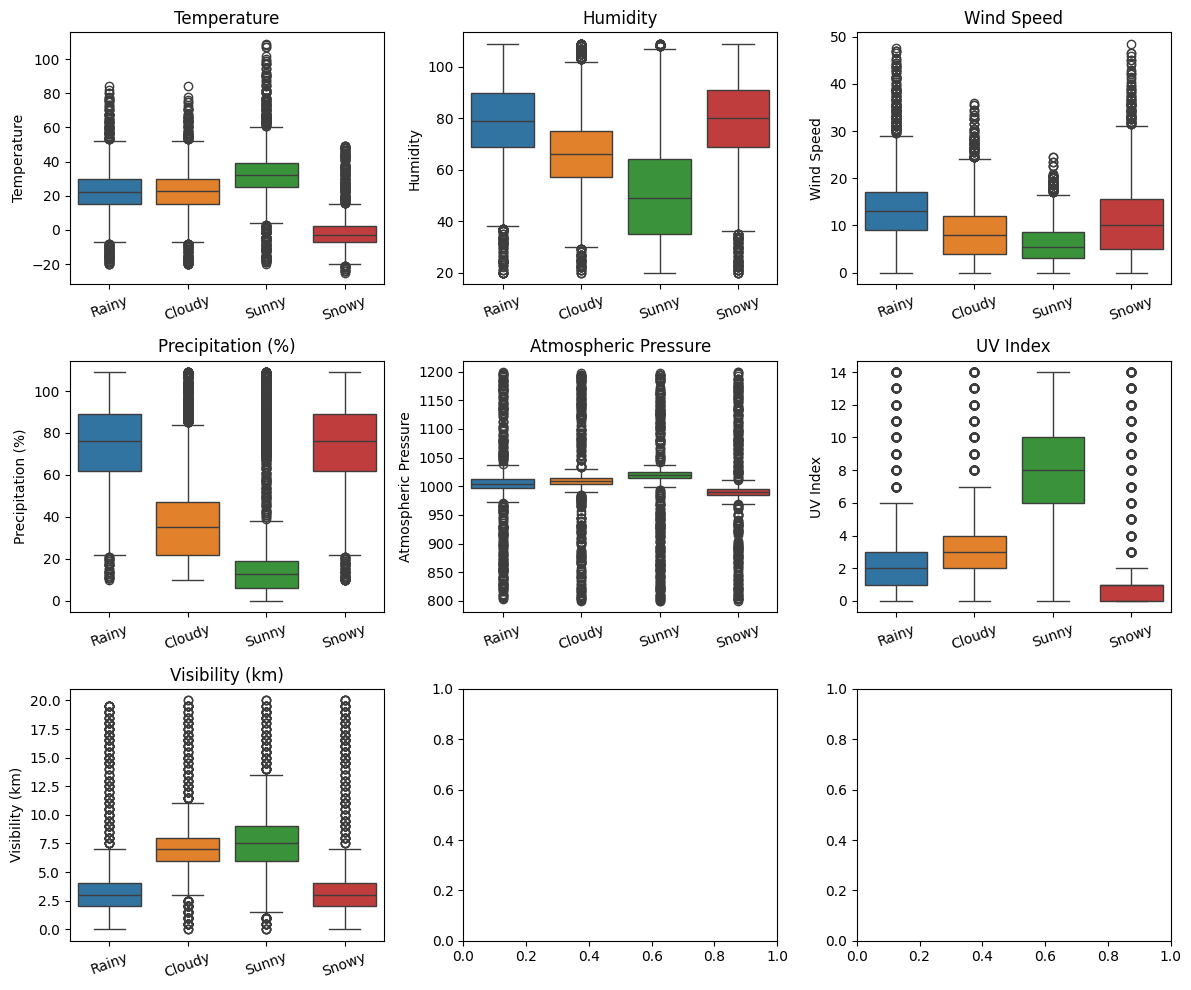

time: 1.27 s (started: 2024-07-10 01:10:03 +09:00)


In [17]:
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 10))
ax = ax.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=data, x=target, y=col, hue=target, ax=ax[i], legend=False)
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=20)
    ax[i].set_xlabel("")
    
for j in range(i + 1, len(numerical_cols)):
    fig.delaxes(ax[j])
    
plt.tight_layout()
plt.show()

### Target vs. Feature stripolot

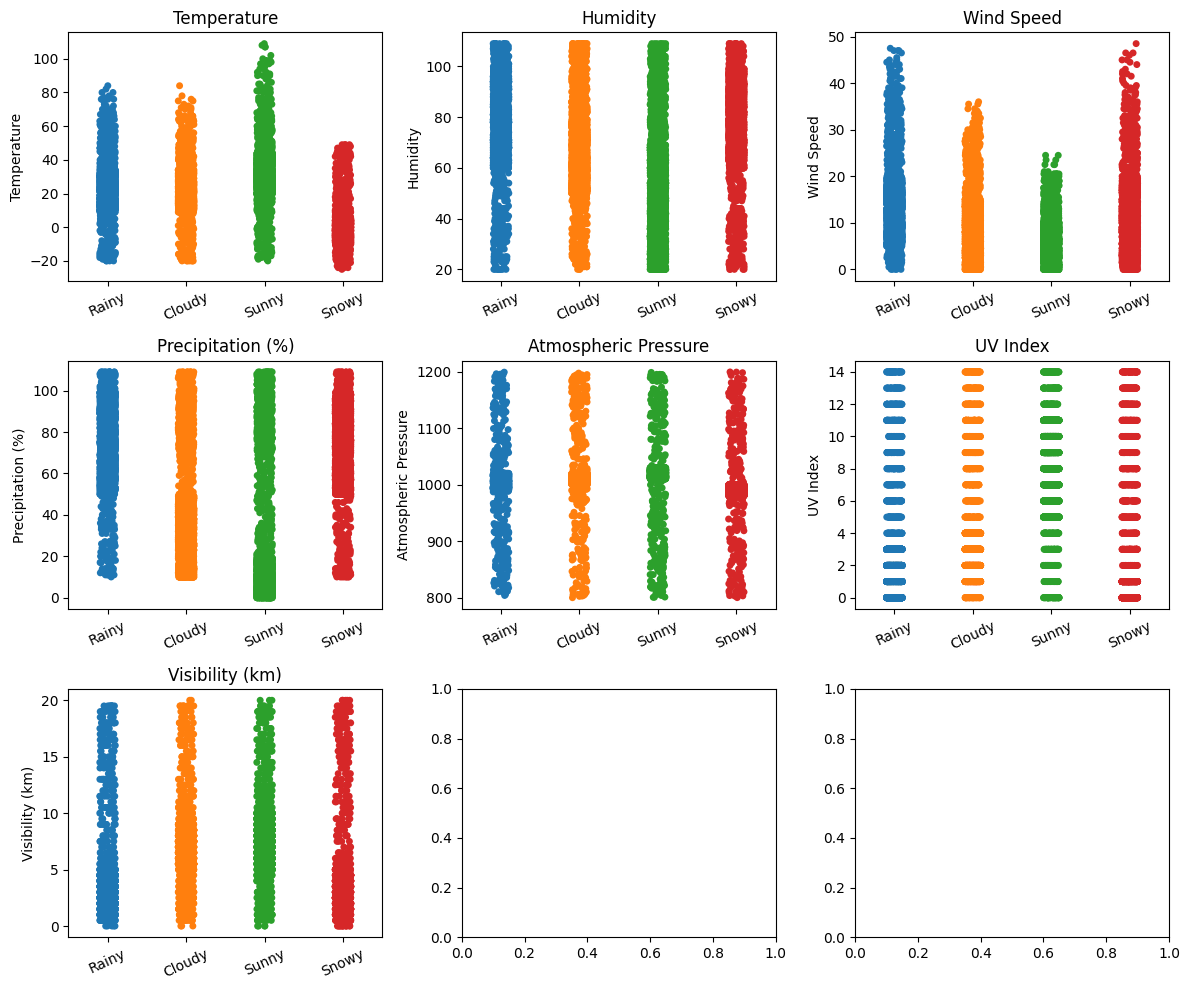

time: 1.39 s (started: 2024-07-10 01:10:04 +09:00)


In [18]:
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 10))
ax = ax.flatten()

for i, col in enumerate(numerical_cols):
    sns.stripplot(data=data, x=target, y=col, hue=target, ax=ax[i], legend=False)
    ax[i].set_title(col)
    ax[i].tick_params(axis='x', rotation=25)
    ax[i].set_xlabel("")
    
for j in range(i + 1, len(numerical_cols)):
    fig.delaxes(ax[j])
    
plt.tight_layout()
plt.show()

### Labelwise Feature Distribution with ANOVA Test

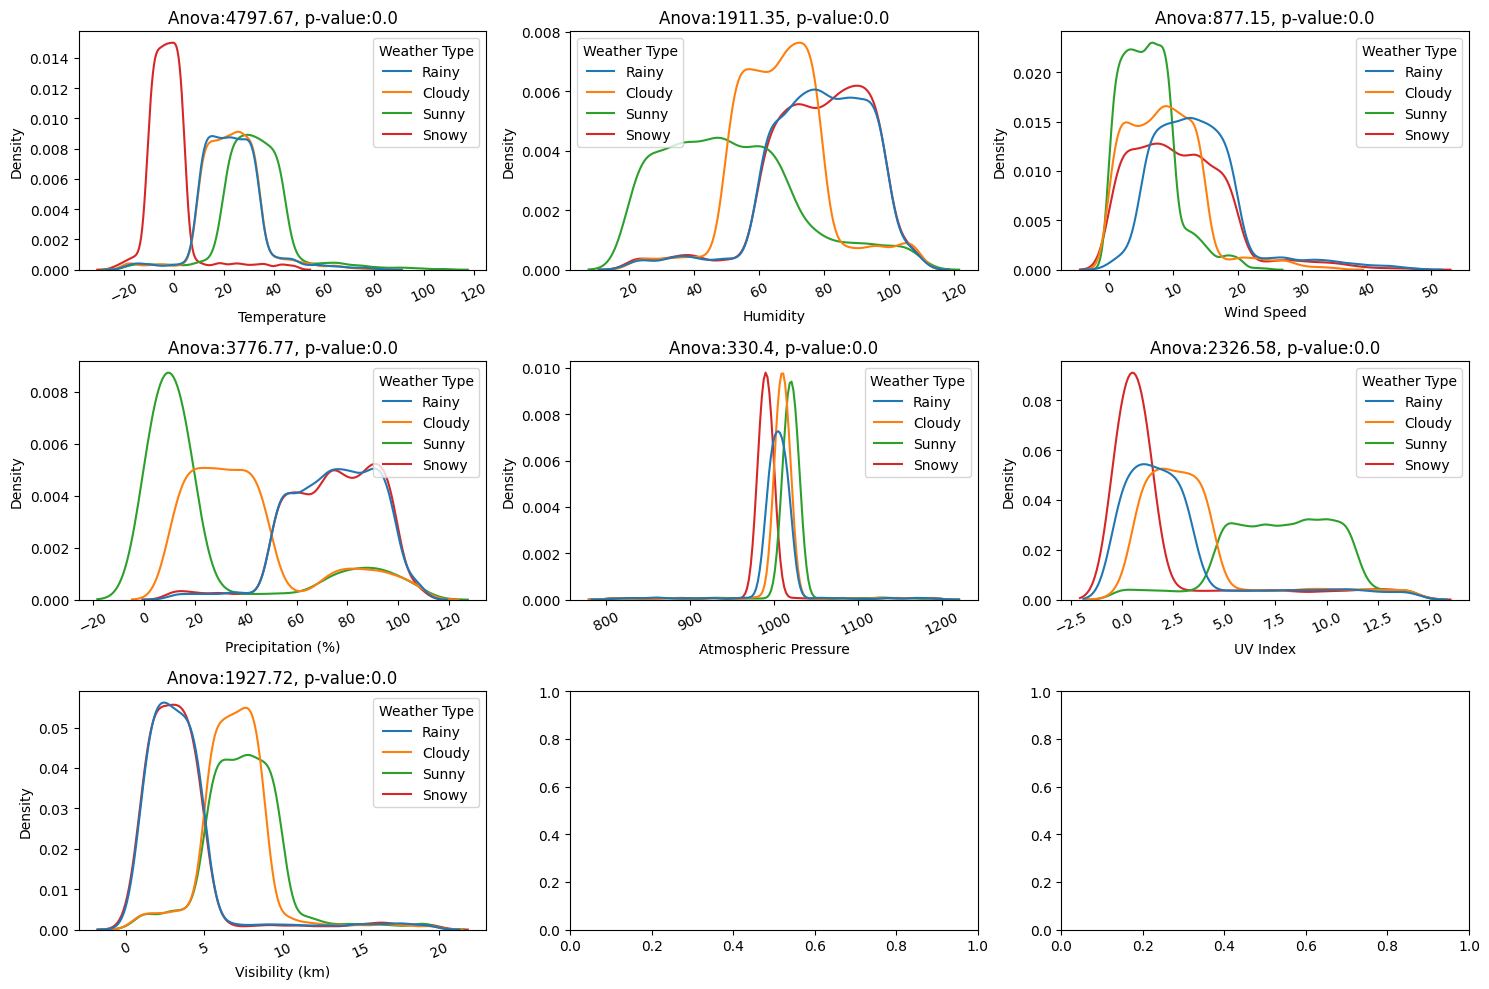

time: 1.97 s (started: 2024-07-10 01:10:06 +09:00)


In [19]:
n_cols = 3
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))
ax = ax.flatten()
num_selected = []

for i, col in enumerate(numerical_cols):
    k = dict(list(data.groupby(target)[col]))
    f, p = stats.f_oneway(*k.values())
    text_str = f"Anova:{round(f, 2)}, p-value:{round(p, 2)}"
    
    if p < 0.2 and col not in num_selected:
        num_selected.append(col)
        
    sns.kdeplot(data=data, x=col, hue=target, ax=ax[i])
    ax[i].set_title(text_str)
    ax[i].tick_params(axis='x', rotation=25)
    
for j in range(i + 1, len(numerical_cols)):
    fig.delaxes(ax[j])
    
plt.tight_layout()
plt.show()

In [20]:
print(f"Selected numerical columns with p-value < 0.2:\n{num_selected}")

Selected numerical columns with p-value < 0.2:
['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
time: 0 ns (started: 2024-07-10 01:10:08 +09:00)


### Heatmap

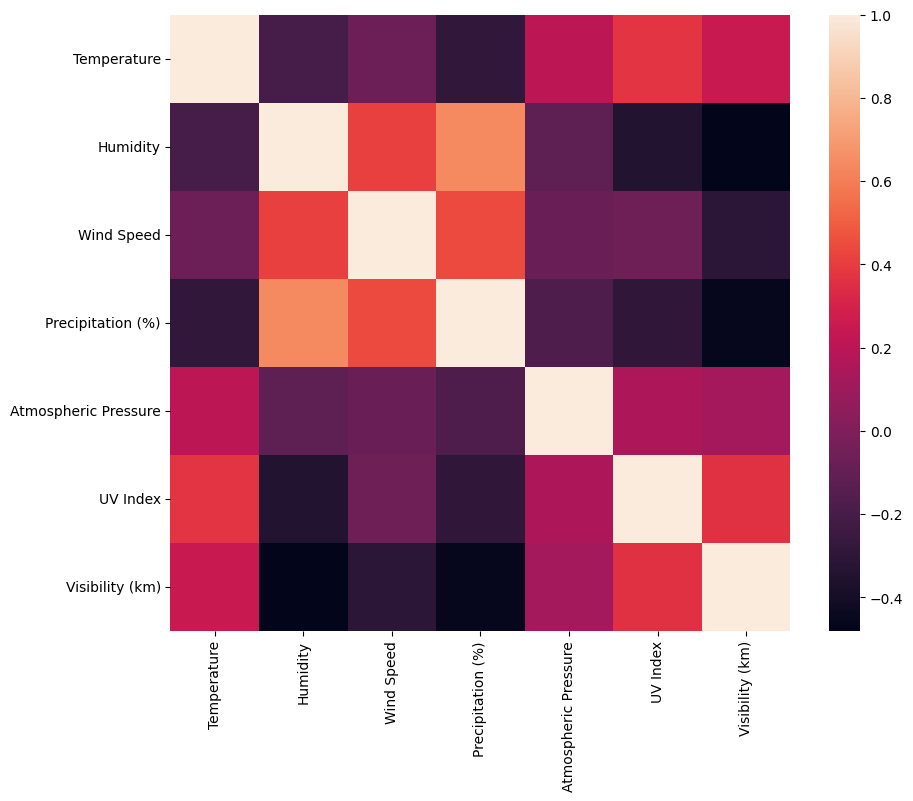

time: 157 ms (started: 2024-07-10 01:10:08 +09:00)


In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_cols].corr())
plt.show()

## Preprocessing

In [22]:
data.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

time: 16 ms (started: 2024-07-10 01:10:08 +09:00)


In [23]:
X = data[cat_selected + num_selected].values
Y = data[target].values

time: 16 ms (started: 2024-07-10 01:10:08 +09:00)


### Splitting Dataset

In [24]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

time: 15 ms (started: 2024-07-10 01:10:08 +09:00)


### Label Encoding Target Column

In [25]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

time: 0 ns (started: 2024-07-10 01:10:08 +09:00)


### Normalization

In [26]:
ss = StandardScaler()
x_train[:, len(cat_selected):] = ss.fit_transform(x_train[:, len(cat_selected):])
x_test[:, len(cat_selected):] = ss.transform(x_test[:, len(cat_selected):])

time: 15 ms (started: 2024-07-10 01:10:08 +09:00)


### One Hot Encoding Categorical Features

In [27]:
ct = ColumnTransformer(transformers=[("encoder", OneHotEncoder(sparse_output=False), [*range(len(cat_selected))])], remainder="passthrough")
x_train = np.array(ct.fit_transform(x_train))
x_test = np.array(ct.transform(x_test))

time: 16 ms (started: 2024-07-10 01:10:08 +09:00)


## Training Models

In [28]:
all_models = []

def train_and_evaluate_model(model: object, x_train: np.ndarray=x_train, y_train: np.ndarray=y_train, 
                            x_test: np.ndarray=x_test, y_test: np.ndarray=y_test) -> None:
    
    # train the model
    model.fit(x_train, y_train)
    
    # append the trained model and its class to the all_models list
    all_models.append((model.__class__.__name__, model))
    
    # display the trained model
    display(model)
    
    # predict on the test set
    y_pred = model.predict(x_test)
    
    # print confusion matrix and accuracy score
    print(confusion_matrix(y_test, y_pred))
    print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

time: 0 ns (started: 2024-07-10 01:10:08 +09:00)


### Support Vector Classifier

In [29]:
classifier1 = SVC(C=30, kernel="rbf")

train_and_evaluate_model(classifier1)

SVC(C=30)

[[579  39  15  18]
 [ 48 576  10  13]
 [ 11  20 660  10]
 [ 29  20  15 577]]
Accuracy Score: 0.906060606060606
time: 1.09 s (started: 2024-07-10 01:10:08 +09:00)


### Random Forest Classifier

In [30]:
classifier2 = RandomForestClassifier(n_estimators=100, criterion="gini", random_state=42)

train_and_evaluate_model(classifier2)

RandomForestClassifier(random_state=42)

[[589  39  12  11]
 [ 40 591   5  11]
 [ 14  13 661  13]
 [ 27  17  19 578]]
Accuracy Score: 0.9162878787878788
time: 750 ms (started: 2024-07-10 01:10:09 +09:00)


### Logistic Regression

In [31]:
classifier3 = LogisticRegression(max_iter=1000)

train_and_evaluate_model(classifier3)

LogisticRegression(max_iter=1000)

[[549  57  20  25]
 [ 46 543  50   8]
 [ 20   8 659  14]
 [ 52  25  15 549]]
Accuracy Score: 0.8712121212121212
time: 78 ms (started: 2024-07-10 01:10:10 +09:00)


### Naive Bayes Classifier

In [32]:
classifier4 = GaussianNB()

train_and_evaluate_model(classifier4)

GaussianNB()

[[528  78  44   1]
 [ 61 492  94   0]
 [ 30  14 657   0]
 [184  36   9 412]]
Accuracy Score: 0.7912878787878788
time: 16 ms (started: 2024-07-10 01:10:10 +09:00)


### KNN Classifier

In [33]:
classifier5 = KNeighborsClassifier(n_neighbors=15, p=5, metric="minkowski")

train_and_evaluate_model(classifier5)

KNeighborsClassifier(n_neighbors=15, p=5)

[[565  46  12  28]
 [ 38 562  30  17]
 [ 17  11 660  13]
 [ 51  29  11 550]]
Accuracy Score: 0.8852272727272728
time: 1.22 s (started: 2024-07-10 01:10:10 +09:00)


### Decision Tree Classifier

In [34]:
classifier6 = DecisionTreeClassifier(criterion="entropy", random_state=42)

train_and_evaluate_model(classifier6)

DecisionTreeClassifier(criterion='entropy', random_state=42)

[[582  29  15  25]
 [ 39 571  15  22]
 [  9  13 663  16]
 [ 28  18  18 577]]
Accuracy Score: 0.906439393939394
time: 62 ms (started: 2024-07-10 01:10:11 +09:00)


### XBGoost Classifier

In [35]:
classifier7 = xgb.XGBClassifier()

train_and_evaluate_model(classifier7)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

[[582  34  20  15]
 [ 33 588  14  12]
 [ 15  14 661  11]
 [ 24  13  20 584]]
Accuracy Score: 0.9147727272727273
time: 422 ms (started: 2024-07-10 01:10:11 +09:00)


### Ensemble Model (Voting Based)

In [36]:
final_model = VotingClassifier(all_models, voting='hard')
final_model.fit(x_train, y_train)

VotingClassifier(estimators=[('SVC', SVC(C=30)),
                             ('RandomForestClassifier',
                              RandomForestClassifier(random_state=42)),
                             ('LogisticRegression',
                              LogisticRegression(max_iter=1000)),
                             ('GaussianNB', GaussianNB()),
                             ('KNeighborsClassifier',
                              KNeighborsClassifier(n_neighbors=15, p=5)),
                             ('DecisionTreeClassifier',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=42)...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...))])

time: 2 s (started: 2024-07-10 01:10:12 +09:00)


In [37]:
y_pred_final = final_model.predict(x_test)

print(confusion_matrix(y_test, y_pred_final))
print(f"Accuracy_score: {accuracy_score(y_test, y_pred_final)}")

[[592  37  12  10]
 [ 44 587   9   7]
 [ 16  14 662   9]
 [ 37  17  15 572]]
Accuracy_score: 0.9140151515151516
time: 1.45 s (started: 2024-07-10 01:10:14 +09:00)
